## strides

In [ ]:
import numpy as np
print(f'{np.__version__=}')

 - [ ] Understand strides

A segment of memory is inherently 1-dimensional, and there are many different schemes for arranging the items of an N-dimensional array in a 1-dimensional block. NumPy is flexible, and ndarray objects can accommodate any ***strided indexing scheme***.

### Challenge: implement your own numpy-like multi-dimensional array with C pointers!

## `ufunc`

# Form Python To Numpy

https://www.labri.fr/perso/nrougier/from-python-to-numpy

In [4]:
import random

import numpy as np
np.__version__

'1.24.3'

### Random Walk

In [19]:
N = 10_000

In [20]:
def random_walk(n):
    position = 0
    walk = [position]
    
    for i in range(n):
        position += 2*random.randint(0,1)-1
        walk.append(position)
    return walk

In [21]:
%%timeit
x = random_walk(n=N)

3.46 ms ± 70.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
from itertools import accumulate

In [36]:
def random_walk_faster(n):
    steps = random.choices([-1,1], k=n)
    walk = [0] + list(accumulate(steps))
    return walk

In [37]:
%%timeit
x = random_walk_faster(n=N)

615 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
3.46e-3 / (500*10**(-6))

6.92

In [29]:
(500*10**(-6)) / 3.46e-3

0.14450867052023122

In [32]:
n = N
steps = np.random.choice([-1,1], n)
np.cumsum(steps)

array([  1,   2,   1, ..., -26, -27, -28])

In [38]:
def random_walk_fastest(n=1000):
    # No 's' in numpy choice (Python offers choice & choices)
    steps = np.random.choice([-1,+1], n)
    return np.cumsum(steps)

In [41]:
N = 99
len(random_walk(N)), len(random_walk_faster(N)), len(random_walk_fastest(N))

(100, 100, 99)

There is a subtle incorrectness in `random_walk_fastest`. It does not return the first position `0`, compared to other two implementations. The following code demonstrates this:

```python
N = 99
print(len(random_walk(N)), len(random_walk_faster(N)), len(random_walk_fastest(N)))
# >>> (100, 100, 99)
```

This may look as a minor distinction, but may cause bugs. There are two ways to remove this inconsistency: exclude initial `0` position from first two functions (trivial) or prepend it to the last function. There are two options for the latter path:

 - [ ] Convert `steps` to numpy list after `cumsum` and concat with `[0]`
 - [ ] Concatenate `np.array([0])`
 - [ ] Allocate empty array in advance, and use `out` parameter of `cumsum`

run_name='option1' 2.272e-05±5.211e-06 sec
run_name='option2_1' 1.346e-05±1.169e-06 sec
run_name='option2_2' 1.364e-05±2.789e-06 sec
run_name='option3_1' 1.518e-05±3.018e-06 sec
run_name='option3_2' 1.537e-05±4.144e-06 sec


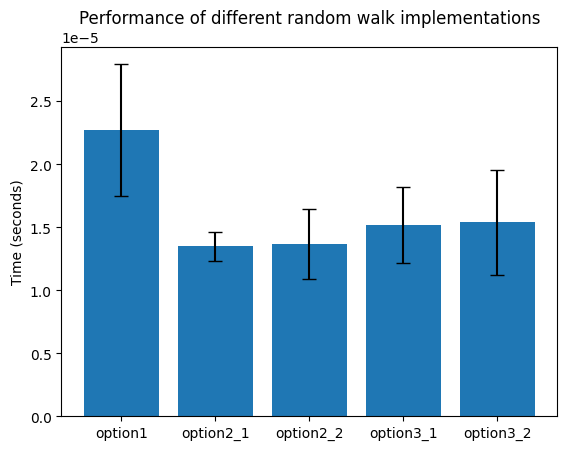

In [81]:
import timeit
import matplotlib.pyplot as plt


# Option 1: Convert `steps` to python list after `cumsum` and concat with `[0]`
def random_walk_option1(n=1000):
    steps = np.random.choice([-1,+1], n)
    steps = np.cumsum(steps)
    return [0] + steps.tolist()

# Option 2.1: Concatenate `np.array([0])`
def random_walk_option2_1(n=1000):
    steps = np.random.choice([-1,+1], n)
    steps = np.cumsum(steps)
    return np.concatenate((np.array([0]), steps))

# Option 2.2: Concatenate `[0]`
def random_walk_option2_2(n=1000):
    steps = np.random.choice([-1,+1], n)
    steps = np.cumsum(steps)
    return np.concatenate(([0], steps))

# Option 3: Allocate empty array in advance, and use `out` parameter of `cumsum`
def random_walk_option3_1(n=1000):
    walk = np.empty(n+1)
    walk[0] = 0
    steps = np.random.choice([-1,+1], n)
    np.cumsum(steps, out=walk[1:])
    return walk


def random_walk_option3_2(n=1000):
    walk = np.zeros(n+1)
    steps = np.random.choice([-1,+1], n)
    np.cumsum(steps, out=walk[1:])
    return walk


# Benchmarking
benchmarks = []
for func in [random_walk_option1, random_walk_option2_1, random_walk_option2_2, random_walk_option3_1, random_walk_option3_2]:
    
    ts = []
    for i in range(11_000):
        start_time = timeit.default_timer()
        out = func()
        end_time = timeit.default_timer()
        t = end_time - start_time
        if i > 1000:
            ts.append(t)
    
    ts_mean = np.mean(ts)
    ts_std = np.std(ts)
    run_name = func.__name__.replace('random_walk_', '')
    print(f'{run_name=} {ts_mean:.3e}±{ts_std:.3e} sec')

    assert len(out) == 1001
    benchmarks.append((run_name, ts_mean, ts_std))

# Plotting with error bars
names, times, stds = zip(*benchmarks)
plt.bar(names, times, yerr=stds, capsize=5)
plt.ylabel('Time (seconds)')
plt.title('Performance of different random walk implementations')
plt.show()

In [ ]:
timeit

array([-3.47670973e-309, -9.03947926e-309, -1.46022488e-308, ...,
        0.00000000e+000, -1.33199835e-255,  0.00000000e+000])

array([  -1.,    0.,    1., ..., -146., -145., -144.])

# Granmda's challenges

### 5.6 Peanut butter

Given `peanut`, a 4x5 array of 0s, and `butter`, a 5-element 1-d array of indices, fill the rows of `peanut` with 1s starting from the column indices given by `butter`.


In [4]:
peanut = np.zeros(shape = (4, 5))
butter = np.array([3, 0, 4, 1])

print(peanut)
print(butter)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[3 0 4 1]


In [15]:
idx = np.tile(np.arange(5), (4,1))
idx

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [18]:
mask = idx >= butter[:,None]
mask

array([[False, False, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [False, False, False, False,  True],
       [False,  True,  True,  True,  True]])

In [20]:
peanut[mask] = 1
peanut

array([[0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1.]])

### One-Hot-Encoding

In [23]:
x = np.array([3, 1, 0, 1])

#### default

In [41]:
m,n = x.shape[0], x.max()+1
out = np.zeros((m,n))
out.shape

(4, 4)

In [42]:
out[np.arange(m), x] = 1.
out

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

#### `eye` reindexing

In [45]:
num_classes = 1 + x.max()
result = np.eye(num_classes)[x]
result

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

### Cumulative Rainfall 🌧

In [47]:
rain_locations = np.array([
    [2,3],
    [0,1],
    [2,2],
    [2,3],
    [1,1],
    [2,3],
    [1,1]
])


rain_amounts = np.array([0.5,1.1,0.2,0.9,1.3,0.4,2.0])

In [ ]:
grid = np.zeros((3,4))